Digital Signal Processing

Assignment #04

Group Members:

1. Navami Kairanda (Enrollment Number:2577665)
1. Pankhuri Vanjani (Enrollment Number:7009617)

In [4]:
%%html
<img src = "1_1_1.png",width=350, height=350>

In [5]:
%%html
<img src = "1_1_2_a.png",width=350, height=350>
<img src = "1_1_2_b.png",width=350, height=350>

In [6]:
%%html
<img src = "1_2_1.png",width=350, height=350>

In [7]:
%%html
<img src = "1_2_2.png",width=350, height=350>

**Practical / Programming Part**

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import sounddevice
from scipy.io import wavfile
import pdb  


3.1 Auto-correlation

In [9]:
def autocorr(signal, maxlags):
    signal -= np.mean(signal)
    
    lag = []
    corr = []
    for l in range(1, maxlags + 1):
        lag.append(l)
        corr.append(np.sum(signal[l:] * signal[:-l]))
    corr /= (len(signal) * np.var(signal))

    corr = np.hstack([np.flip(corr), [1], corr])
    lag = np.hstack([-1 * np.flip(lag), [0], lag])
    return lag, corr

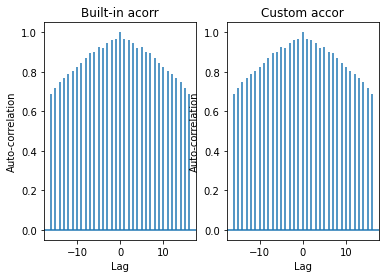

In [10]:
maxlags = 16

samplerate, dsp_recording = wavfile.read('dsp_recorded.wav')
sounddevice.play(dsp_recording, samplerate)

plt_auto = plt.subplot(1, 2, 1)
plt_auto.set_title("Built-in acorr")
plt.xlabel('Lag')
plt.ylabel('Auto-correlation')

lag_auto, corr_auto, _, _ = plt_auto.acorr(dsp_recording, maxlags = 16)
  
plt_manual = plt.subplot(1, 2, 2)
plt_manual.set_title("Custom accor")
plt.xlabel('Lag')
plt.ylabel('Auto-correlation')

lag_manual, corr_manual = autocorr(dsp_recording, maxlags)
plt_manual.axhline()
plt_manual.vlines(lag_manual, 0, corr_manual)

plt.show()
#print(np.linalg.norm(corr_manual - corr_auto), np.linalg.norm(lag_manual - lag_auto))

2.2 Levinson-Durbin Recursion Algorithm

In [11]:
def levinson_durbin_builtin(r, p):
    from scipy.linalg import solve_toeplitz
    a = solve_toeplitz((r[:p], r[:p]), r[1:p+1])
    return a

def levinson_durbin(r, p):
    k = r[1] / r[0]
    a = np.array([k])
    e = (1. - k * k) * r[0]
    for i in range(1, p):
        k = (r[i+1] - np.dot(a, r[1:i+1])) / e
        a = np.r_[k,  a - k * a[i-1::-1]]
        e *= 1. - k*k
    return a[::-1]

In [12]:
a_coeff = levinson_durbin(corr_manual[maxlags:], maxlags)
print(a_coeff)
#a_coeff_builtin = levinson_durbin_builtin(corr_manual[maxlags:], maxlags)
#print(np.linalg.norm(a_coeff_builtin - a_coeff))

[ 0.76215474  0.05343097  0.3814976  -0.54308466  0.64236151 -0.45383602
  0.51068293 -0.56177521  0.34670519 -0.44574413  0.45827604 -0.27747136
  0.34587319 -0.1494301   0.19666367 -0.30137795]


Computation time is O(p*p) if p is the order